<a href="https://colab.research.google.com/github/Sujata2003/Personal-Projects/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode (connected = True)
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("RussiaUkrainewar.csv")

In [ ]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [ ]:
df.shape

(10014, 36)

In [ ]:
df.size

360504

In [ ]:
df['tweet'].head()

0    @nazijaeger__ @derwener @Anonymous9775 Russia ...
1    The Russia HAARP which could destroy USA in on...
2    Putin gives Steven Seagal Russia&amp;#8217;s O...
3    @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...
4    @Pottingpinks @mfa_russia @mod_russia @mil_his...
Name: tweet, dtype: object

In [ ]:
type(df['tweet'])

pandas.core.series.Series

In [ ]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [ ]:
hashtags = hashtag_extract(df["tweet"])
hashtags = sum(hashtags, [])

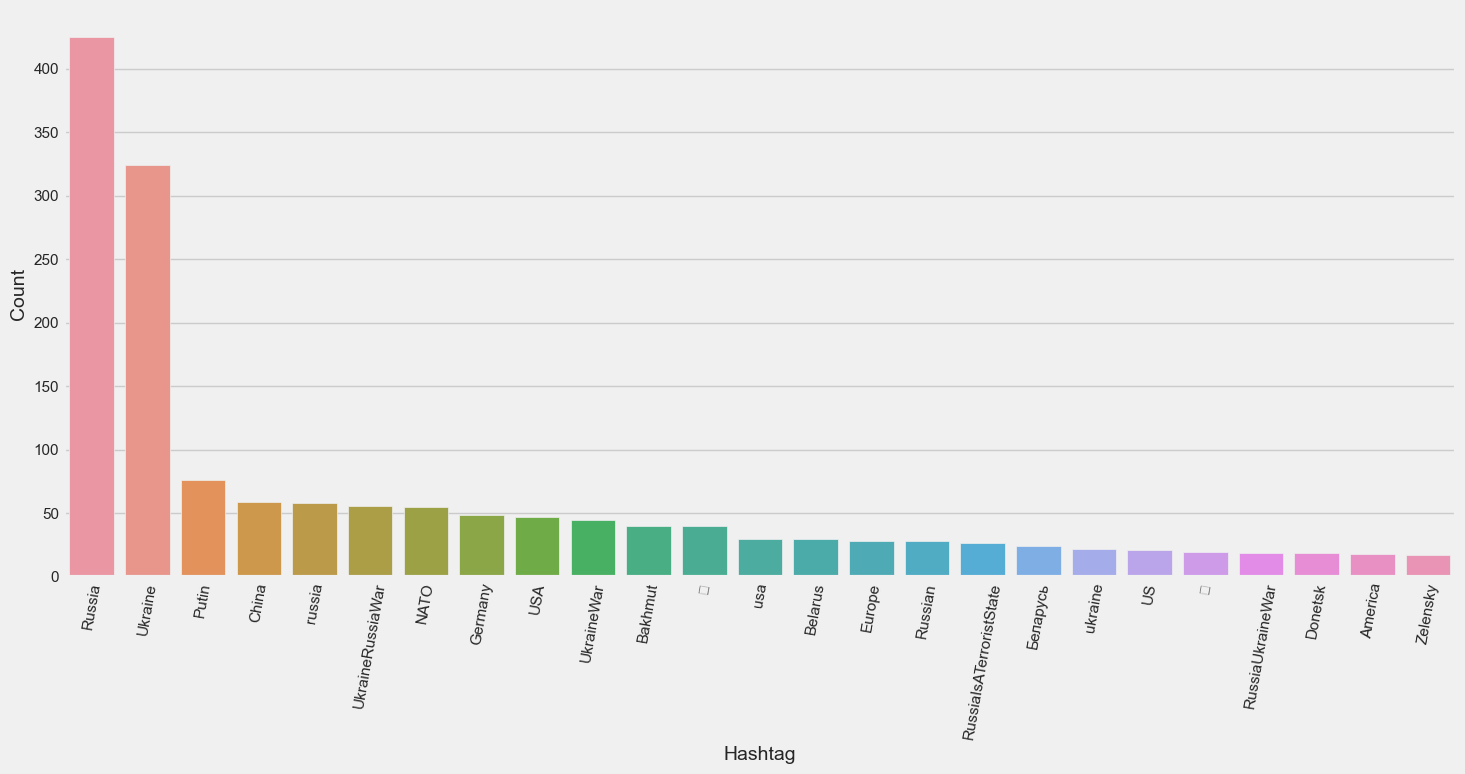

In [ ]:
generate_hashtag_freqdist(hashtags)

In [ ]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+',"",str(text))
  text = re.sub(r'#','',str(text))
  text = re.sub(r'RT[\s]+','',str(text))
  text = re.sub(r'https?:\/\/s+','',str(text))


  return text

df['tweet'] = df['tweet'].apply(cleanText)
df


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1630331110415646721,1630305860298633216,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN
10010,1630331106305122304,1630202100369043459,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN
10011,1630331106296844288,1630301689818275840,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
10012,1630331102480171009,1630181795101540357,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,25588052,late49er,Ben Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RonFilipkowski', 'name': 'Ro...",NaN,NaN,NaN,NaN


In [ ]:
# df['tweet'] = df['tweet'].str.replace(r'@','')
df['tweet']

0            __   Russia is a place where Satan rules well
1        The Russia HAARP which could destroy USA in on...
2        Putin gives Steven Seagal Russia&amp;8217;s Or...
3           It’s ALWAYS PROJECTION or Russia with him!!!!!
4         _russia _russia _hist_rf  _ru   How many mill...
                               ...                        
10009     Its not Ukraine which investere war. Russia a...
10010    _username_ There were very dark rumors that Ze...
10011     If Russia lose the Rothschild are coming afte...
10012              Look forward to Russia liberating Kiev.
10013    _lilas I read it yes. It is heartbreaking.  ru...
Name: tweet, Length: 10014, dtype: object

In [ ]:
# Subjective
def getSubjectivity(text):
  return TextBlob(str(text)).sentiment.subjectivity

#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#new columns
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

#show new df
df


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Subjectivity,Polarity
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN,0.000000,0.0000
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000000,-0.2000
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000000,0.0000
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN,0.000000,0.0000
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN,0.387500,-0.0750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1630331110415646721,1630305860298633216,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN,0.333333,0.0000
10010,1630331106305122304,1630202100369043459,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN,0.760000,-0.3475
10011,1630331106296844288,1630301689818275840,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN,0.500000,0.0000
10012,1630331102480171009,1630181795101540357,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,25588052,late49er,Ben Davis,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'RonFilipkowski', 'name': 'Ro...",NaN,NaN,NaN,NaN,0.000000,0.0000


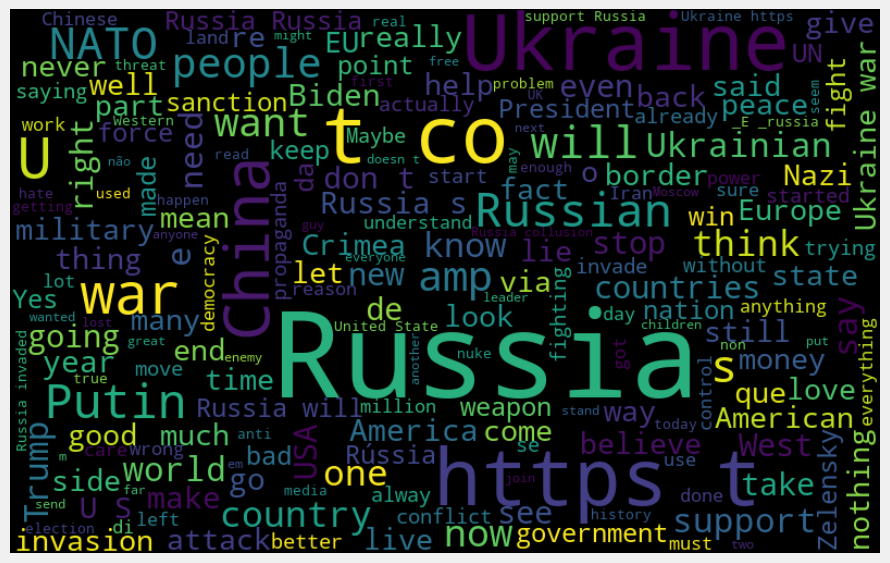

In [ ]:
allWords = ' '.join( [twts for twts in df['tweet']])
wordCloud = WordCloud(width = 800, height=500, random_state = 21, max_font_size = 110).generate(allWords)

plt.figure(figsize=(10,7))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

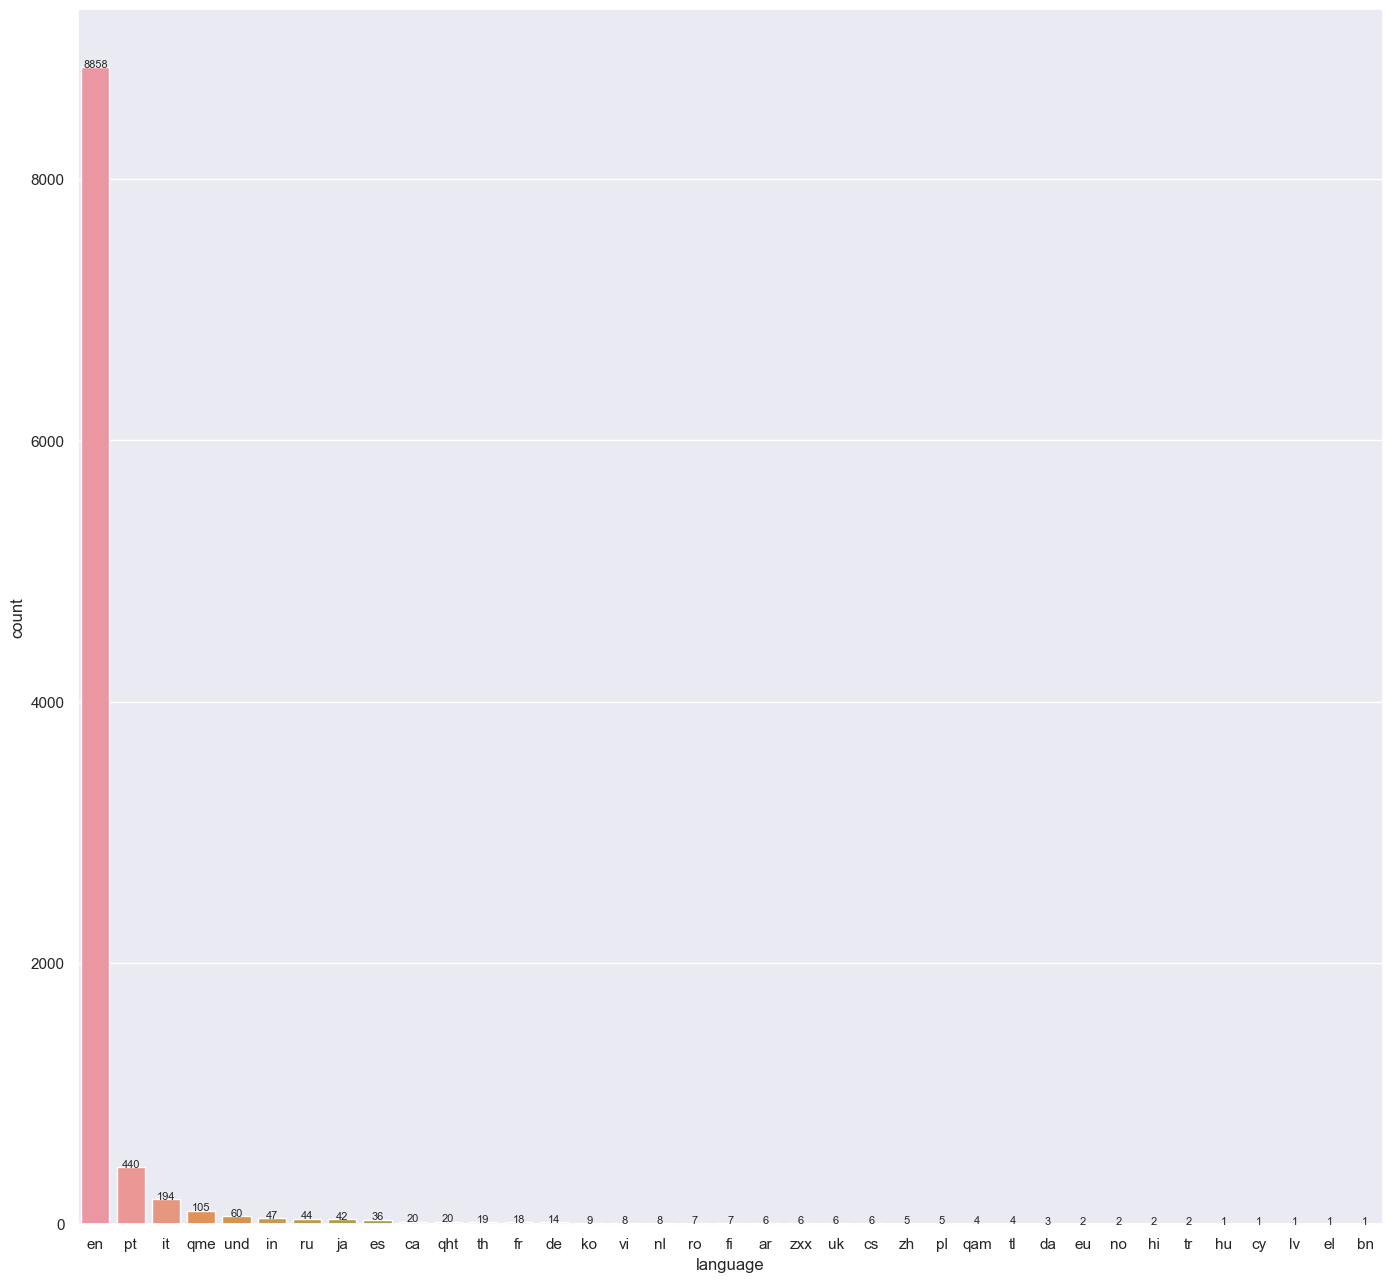

In [ ]:

ax = sns.countplot(x=df['language'],data= df, order = df['language'].value_counts().index)
sns.set(rc={'figure.figsize':(15,15)})
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['language'].value_counts()[i],ha="center", fontsize = 8)
    i += 1


In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
from numpy.ma.core import negative
#create a fuction to compute the negative, neutral and postive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
   return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [ ]:
df[['tweet', 'Analysis', 'Polarity', 'Subjectivity' ]]


,tweet,Analysis,Polarity,Subjectivity
0,__ Russia is a place where Satan rules well,Neutral,0.0000,0.000000
1,The Russia HAARP which could destroy USA in on...,Negative,-0.2000,0.000000
2,Putin gives Steven Seagal Russia&amp;8217;s Or...,Neutral,0.0000,0.000000
3,It’s ALWAYS PROJECTION or Russia with him!!!!!,Neutral,0.0000,0.000000
4,_russia _russia _hist_rf _ru How many mill...,Negative,-0.0750,0.387500
...,...,...,...,...
10009,Its not Ukraine which investere war. Russia a...,Neutral,0.0000,0.333333
10010,_username_ There were very dark rumors that Ze...,Negative,-0.3475,0.760000
10011,If Russia lose the Rothschild are coming afte...,Neutral,0.0000,0.500000
10012,Look forward to Russia liberating Kiev.,Neutral,0.0000,0.000000


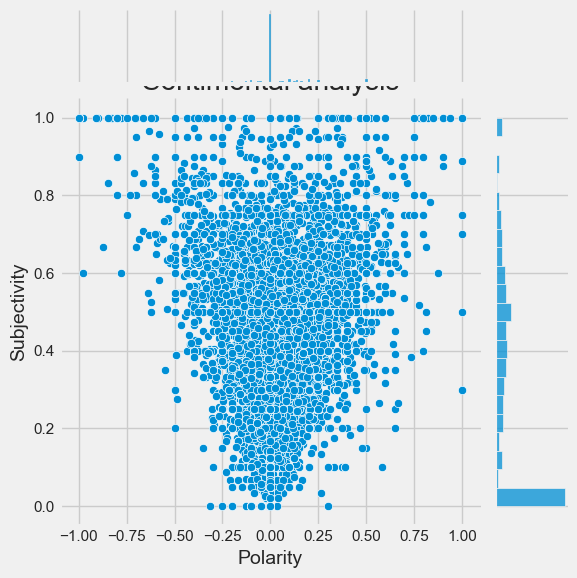

In [ ]:
# df_norm_col=(df_tweet['Polarity'].mean())/df_tweet['Subjectivity'].std()
sns.jointplot(x=df['Polarity'],y=df['Subjectivity'])
plt.title('Sentimental analysis')
plt.show()

In [ ]:
ptweets = df[df['Analysis'] == 'Positive']
ptweets = ptweets['tweet']

round((ptweets.shape[0] / df.shape[0]) * 100,1)

38.0

In [ ]:
ntweets = df[df['Analysis'] == 'Negative']
ntweets = ntweets['tweet']

round((ntweets.shape[0] / df.shape[0]) * 100,1)


24.6

In [ ]:
neutweets = df[df['Analysis'] == 'Neutral']
neutweets = neutweets['tweet']

round((neutweets.shape[0] / df.shape[0]) * 100,1)


37.4

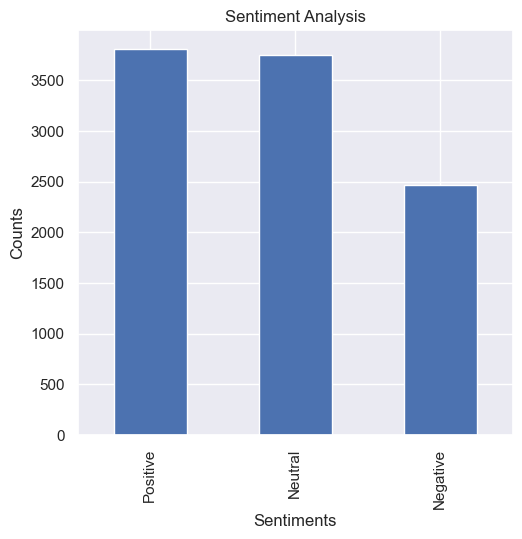

In [ ]:
plt.figure(figsize=(5,5))
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

### End OF The Project